In [311]:
## import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter


In [312]:
## read csv file downloaded from MBTA website (https://mbta-massdot.opendata.arcgis.com/datasets/MassDOT::mbta-commuter-rail-ridership-by-service-date-and-line/about)

df = pd.read_csv(r'C:\Users\Donut\Downloads\MBTA_Commuter_Rail_Ridership_by_Service_Date_and_Line.csv')

In [313]:
## quick look at the dataset

df.head()

,ObjectId,service_date,line,estimated_boardings
0,1,2020/06/22 04:00:00+00,Providence/Stoughton,447.0
1,2,2020/06/22 04:00:00+00,Newburyport/Rockport,697.0
2,3,2020/06/22 04:00:00+00,Framingham/Worcester,33.0
3,4,2020/06/22 04:00:00+00,Franklin/Foxboro,276.0
4,5,2020/06/22 04:00:00+00,Middleborough/Lakeville,601.0


In [314]:
## looking at column names, data types, number of rows(13340), number of columns(4), and number of non-null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13340 entries, 0 to 13339
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ObjectId             13340 non-null  int64  
 1   service_date         13340 non-null  object 
 2   line                 13340 non-null  object 
 3   estimated_boardings  13340 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 417.0+ KB


In [315]:
## checking if there are duplicate data

df.duplicated().sum()

0

In [316]:
## checking if there are any NaN data

df.isna().sum()

ObjectId               0
service_date           0
line                   0
estimated_boardings    0
dtype: int64

In [317]:
## converting 'service_date' column to datetime format to split into month, day, year columns

df['service_date'] = pd.to_datetime(df['service_date'])

df['month'] = df['service_date'].dt.month
df['day'] = df['service_date'].dt.day
df['year'] = df['service_date'].dt.year

In [318]:
df.head()

,ObjectId,service_date,line,estimated_boardings,month,day,year
0,1,2020-06-22 04:00:00+00:00,Providence/Stoughton,447.0,6,22,2020
1,2,2020-06-22 04:00:00+00:00,Newburyport/Rockport,697.0,6,22,2020
2,3,2020-06-22 04:00:00+00:00,Framingham/Worcester,33.0,6,22,2020
3,4,2020-06-22 04:00:00+00:00,Franklin/Foxboro,276.0,6,22,2020
4,5,2020-06-22 04:00:00+00:00,Middleborough/Lakeville,601.0,6,22,2020


In [322]:
## converting 'estimated_boardings' to int as there shouldn't be any decimals for passenger boardings

df['estimated_boardings'] = df['estimated_boardings'].astype('int64')

## 1.) Which line had the most boardings?

In [323]:
total_boardings = df.groupby('line')['estimated_boardings'].sum()

total_boardings

line
Fairmount                   1518028
Fitchburg                   3206518
Framingham/Worcester        6771082
Franklin/Foxboro            4452905
Greenbush                   1823472
Haverhill                   3175366
Kingston                    2447394
Lowell                      3957857
Middleborough/Lakeville     3285296
Needham                     2704563
Newburyport/Rockport        7055788
Providence/Stoughton       10894972
Name: estimated_boardings, dtype: int64

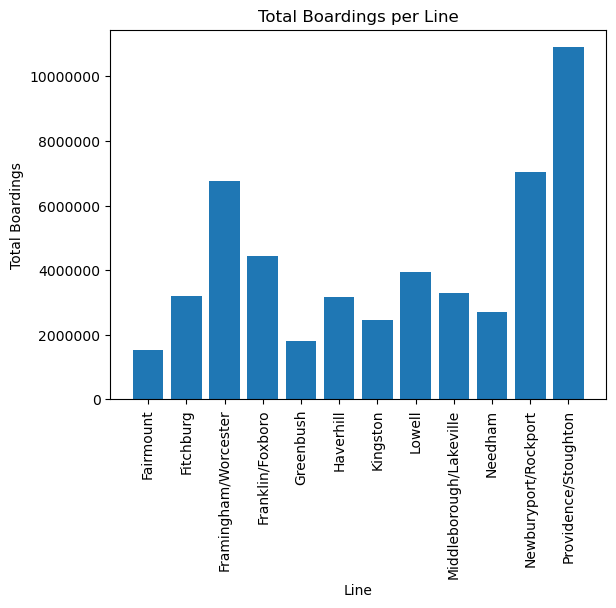

In [324]:
## plotting bar graph to show total boardings per each line

lines = ['Fairmount', 'Fitchburg', 'Framingham/Worcester', 'Franklin/Foxboro', 'Greenbush', 'Haverhill', 'Kingston', 'Lowell', 'Middleborough/Lakeville', 'Needham', 'Newburyport/Rockport', 'Providence/Stoughton']

plt.bar(x = lines, height = total_boardings)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(lines, rotation = 90)
plt.xlabel('Line')
plt.ylabel('Total Boardings')
plt.title('Total Boardings per Line')
plt.show()

## 2.) Comparing total boardings per year

In [325]:
## this dataset contains dates from 6/22/2020 to 10/31/2023

print(df['service_date'].min())
print(df['service_date'].max())

2020-06-22 04:00:00+00:00
2023-10-31 04:00:00+00:00


In [326]:
## grouping together the total boardings per year
yearly_boardings = df.groupby('year')['estimated_boardings'].sum()

yearly_boardings

year
2020     1872335
2021     8812500
2022    19022244
2023    21586162
Name: estimated_boardings, dtype: int64

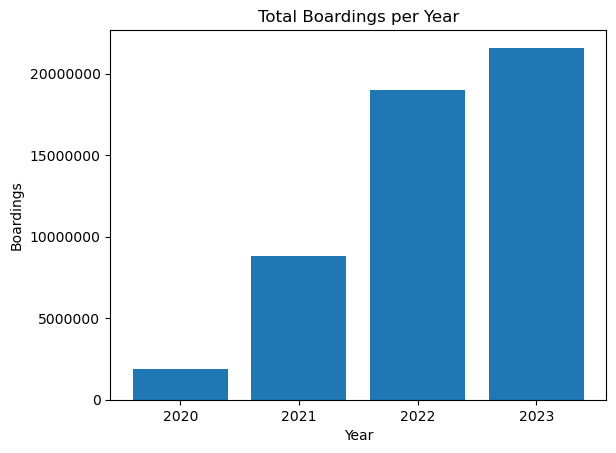

In [327]:
## plotting bar graph to show total boardings per year

years = ['2020', '2021', '2022', '2023']

plt.bar(years, height = yearly_boardings)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Year')
plt.ylabel('Boardings')
plt.title('Total Boardings per Year')
plt.show()

## 3.) Comparing total boardings between the months in 2023

In [328]:
## filtering data to year '2023' and then grouping together data by 'month'

monthly_2023 = df[df['year'] == 2023].groupby('month')['estimated_boardings'].sum()
monthly_2023

month
1     1840509
2     1704568
3     2106535
4     2075362
5     2318035
6     2288229
7     2187348
8     2396618
9     2121006
10    2547952
Name: estimated_boardings, dtype: int64

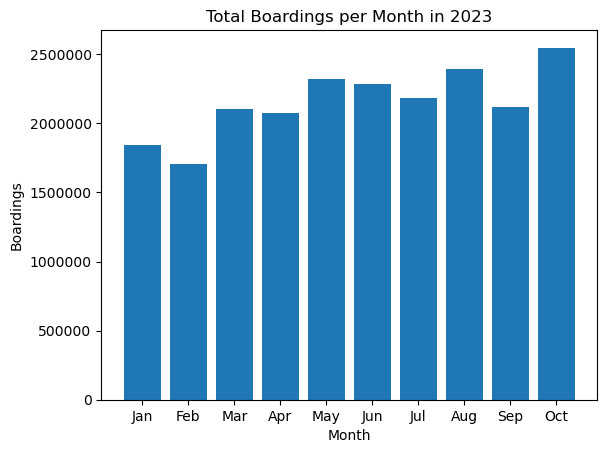

In [329]:
## plotting the bar graph
month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug', 'Sep','Oct']

plt.bar(month, monthly_2023)
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.xticks(month)
plt.xlabel('Month')
plt.ylabel('Boardings')
plt.title('Total Boardings per Month in 2023')
plt.show()

## 4.) Comparing total estimated boardings per month for all 4 years

In [289]:
## gather the other year's monthly estimated boardings
monthly_2023 = df[df['year'] == 2023].groupby('month')['estimated_boardings'].sum()
monthly_2022 = df[df['year'] == 2022].groupby('month')['estimated_boardings'].sum()
monthly_2021 = df[df['year'] == 2021].groupby('month')['estimated_boardings'].sum()
monthly_2020 = df[df['year'] == 2020].groupby('month')['estimated_boardings'].sum()


In [290]:
## create dataframes for each year and rename column of each dataframe to their respective year's data

m2023 = pd.DataFrame(monthly_2023)
m2023.rename(columns = {'estimated_boardings': '2023_estimated_boardings'}, inplace=True)

m2022 = pd.DataFrame(monthly_2022)
m2022.rename(columns = {'estimated_boardings': '2022_estimated_boardings'}, inplace=True)

m2021 = pd.DataFrame(monthly_2021)
m2021.rename(columns = {'estimated_boardings': '2021_estimated_boardings'}, inplace=True)

m2020 = pd.DataFrame(monthly_2020)
m2020.rename(columns = {'estimated_boardings': '2020_estimated_boardings'}, inplace=True)

In [293]:
## concatenate all yearly dataframes into 1 dataframe

df2 = pd.concat([m2020, m2021, m2022, m2023], axis=1)
df2.sort_values(by='month')

,2020_estimated_boardings,2021_estimated_boardings,2022_estimated_boardings,2023_estimated_boardings
month,,,,
1,NaN,222208,859440,1840509.0
2,NaN,231903,970097,1704568.0
3,NaN,311295,1489943,2106535.0
4,NaN,368405,1509267,2075362.0
5,NaN,475892,1526921,2318035.0
6,45348.0,615247,1629720,2288229.0
7,249047.0,771532,1578646,2187348.0
8,275944.0,860458,1731096,2396618.0
9,318729.0,1135782,1955305,2121006.0


## 5.) Comparing Percent Increase/Decrease between months per year

In [310]:
## creating % percent increase/decrease between months per year columns for further analysis

## Percentage Increase = [ (Final Value - Starting Value) / |Starting Value| ] × 100

df2['2020_2021_percentage'] = round(((df2['2021_estimated_boardings'] - df2['2020_estimated_boardings']) / df2['2020_estimated_boardings'] * 100),2)
df2['2021_2022_percentage'] = round(((df2['2022_estimated_boardings'] - df2['2021_estimated_boardings']) / df2['2021_estimated_boardings'] * 100),2)
df2['2022_2023_percentage'] = round(((df2['2023_estimated_boardings'] - df2['2022_estimated_boardings']) / df2['2022_estimated_boardings'] * 100),2)

df2.sort_values(by='month')


,2020_estimated_boardings,2021_estimated_boardings,2022_estimated_boardings,2023_estimated_boardings,2020_2021_percentage,2021_2022_percentage,2022_2023_percentage
month,,,,,,,
1,NaN,222208,859440,1840509.0,NaN,286.77,114.15
2,NaN,231903,970097,1704568.0,NaN,318.32,75.71
3,NaN,311295,1489943,2106535.0,NaN,378.63,41.38
4,NaN,368405,1509267,2075362.0,NaN,309.68,37.51
5,NaN,475892,1526921,2318035.0,NaN,220.85,51.81
6,45348.0,615247,1629720,2288229.0,1256.72,164.89,40.41
7,249047.0,771532,1578646,2187348.0,209.79,104.61,38.56
8,275944.0,860458,1731096,2396618.0,211.82,101.18,38.45
9,318729.0,1135782,1955305,2121006.0,256.35,72.15,8.47
